In [46]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

import utils


df=pd.read_csv('sample_data.csv')
# df=df.loc[df['Type']=='temperature']
# df=df.drop(columns=['Type'])


row='Country'
col= 'City'
line = 'Scenario'
value = 'Value'
period = 'Period'
id= 'test'

#data filters
# rows= ['CountryB', 'CountryA',]
# cols= ['small','large']
# lines= scenarios = ['mild', 'extreme' ,'very extreme']


rows=list(df[row].unique())
cols=list(df[col].unique())
lines=list(df[line].unique())

axis_col='Type'
secondary_ax='rainfall'
df=utils.data_standardize(df,row,col,line,period,value,axis_col)




In [47]:
#These can go in cofig
x_ticks_map = {'PQ0': 'Y0', 'PQ4': 'Y1', 'PQ8': 'Y2', 'PQ12': 'Y3'}
line_props={
'mild': ['solid','green',1],
'extreme': ['solid','red',1],
'very extreme': ['solid','blue',1]
}
line_props_secon={
'mild': ['dashed','black',1],
'extreme': ['dashed','red',1],
'very extreme': ['dashed','blue',1]
}

In [31]:
def create_plots(df, rows, cols, lines, 
                 x_ticks_map=x_ticks_map,
                 width=6, 
                 height=8, 
                 v_line_at="PQ0",
                 line_props=line_props,
                 line_props_secon=line_props_secon,
                 dec=1, 
                 dec_sec=0, 
                 padding=0.1, 
                 title_size=10, 
                 axis_col=None, 
                 secondary_ax=None):
        
    
    
    
    # # Create subplots based on the length of rows and cols
    fig, axs = plt.subplots(len(rows), len(cols), figsize=(width, height))  # Adjust the figsize as needed
    # Adjust the spacing
    fig.subplots_adjust(hspace=0.2, wspace=0.5)  # Adjust these values as needed
    
    
    # Plot the data
    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            ax = axs[i, j]
            # fig.suptitle(cols, x=0.5, y=1.02, ha="center") 
            if i==0:
                ax.set_title(col, fontsize=title_size,pad=20)
            
            if j==len(cols)-1:
                ax.text(1.3, 0.5, row, transform=ax.transAxes, rotation=-90, ha='left', va='center', fontsize=title_size)
                
            if axis_col: 
                ax2 = ax.twinx()
                
                for line in lines:
                    data_to_plot = df[(df['row'] == row) &  (df['col'] == col) &  (df['line'] == line) ]
                    data_to_plot_primary = data_to_plot[data_to_plot['axis_col'] != secondary_ax]
                    data_to_plot_secondary = data_to_plot[data_to_plot['axis_col'] == secondary_ax]  
    
                    #line properties
                    s,c,w=line_props[line]
                    ax.plot(data_to_plot_primary['period'], data_to_plot_primary['value'],
                           linestyle=s,color=c,linewidth=w)  #primary axis
    
                    s,c,w=line_props_secon[line]
                    ax2.plot(data_to_plot_secondary['period'], data_to_plot_secondary['value'],
                           linestyle=s,color=c,linewidth=w) #secondary axis
    
                    lower_limit, upper_limit=utils.get_lower_upper(data_to_plot_primary,padding)
                    ax.set_ylim(lower_limit, upper_limit)
                    
                    lower_limit, upper_limit=utils.get_lower_upper(data_to_plot_secondary,padding)
                    ax2.set_ylim(lower_limit, upper_limit)
    
            else:
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                
                for line in lines:
                    data_to_plot = df[(df['row'] == row) & (df['col'] == col) & (df['line'] == line)]
    
                    s,c,w=line_props[line]
                    ax.plot(data_to_plot['period'], data_to_plot['value'],
                           linestyle=s,color=c,linewidth=w)
    
                    lower_limit, upper_limit=utils.get_lower_upper(data_to_plot,padding)
                    ax.set_ylim(lower_limit, upper_limit)
    
    
            #axis management
            ax_statements=[
                            "ax.set_xticks([k for k in x_ticks_map.keys()])",
                            "ax.set_xticklabels([v for v in x_ticks_map.values()])",
                            "ax.axvline(v_line_at, color='gray', linestyle='--', alpha=0.7)",
                            "ax.xaxis.set_tick_params(labelsize=9)",
                            "ax.spines['top'].set_visible(False)",
                            "ax.yaxis.set_major_formatter(lambda y, pos, dec=dec: f'{y:.{dec}f}')",
                            "ax.yaxis.set_tick_params(labelsize=9)",
                            "ax2.spines['top'].set_visible(False)",
                            "ax2.yaxis.set_major_formatter(lambda y, pos, dec_sec=dec_sec: f'{y:.{dec_sec}f}')",
                            "ax2.yaxis.set_tick_params(labelsize=9)"
            ]
    
            for statement in ax_statements:
                try:
                    exec(statement)
                except Exception as e:
                    pass
             
    # Adjust the layout
    # plt.tight_layout()  don't use this because we are manually adjusting spaces in subplots
    
    plt.show()
    
    # Show the plot
    fig.savefig('file1.png', dpi=400)


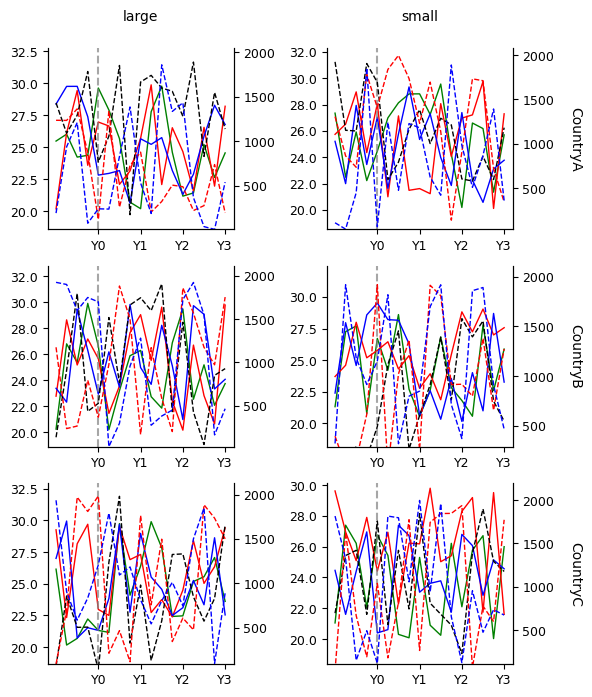

In [48]:
create_plots(df, rows, cols, lines,axis_col=axis_col,secondary_ax=secondary_ax)